In [ ]:
!pip install -q kaggle==1.5.8

In [ ]:
!pip install opendatasets

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/c/aptos2019-blindness-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadmarlianur
Your Kaggle Key: ··········


100%|███████████████████████████████████████████████████████████████████████████| 9.51G/9.51G [1:21:49<00:00, 2.08MB/s]



Extracting archive .\aptos2019-blindness-detection/aptos2019-blindness-detection.zip to .\aptos2019-blindness-detection


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
train_dir = 'aptos2019-blindness-detection/train_images'
test_dir = 'aptos2019-blindness-detection/test_images'

In [ ]:
train_csv=pd.read_csv('aptos2019-blindness-detection/train.csv')
test_csv=pd.read_csv('aptos2019-blindness-detection/test.csv')

In [ ]:
train=[]
trainlabel=[]
for im in tqdm(os.listdir(train_dir)):
    image=load_img(os.path.join(train_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    train+=[image]
    trainlabel+=[train_csv[train_csv['id_code']==im[0:-4]]['diagnosis'].iat[0]]

100%|██████████████████████████████████████████████████████████████████████████████| 3662/3662 [08:24<00:00,  7.26it/s]


In [ ]:
test=[]
for im in tqdm(os.listdir(test_dir)):
    image=load_img(os.path.join(test_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]


100%|██████████████████████████████████████████████████████████████████████████████| 1928/1928 [01:48<00:00, 17.84it/s]


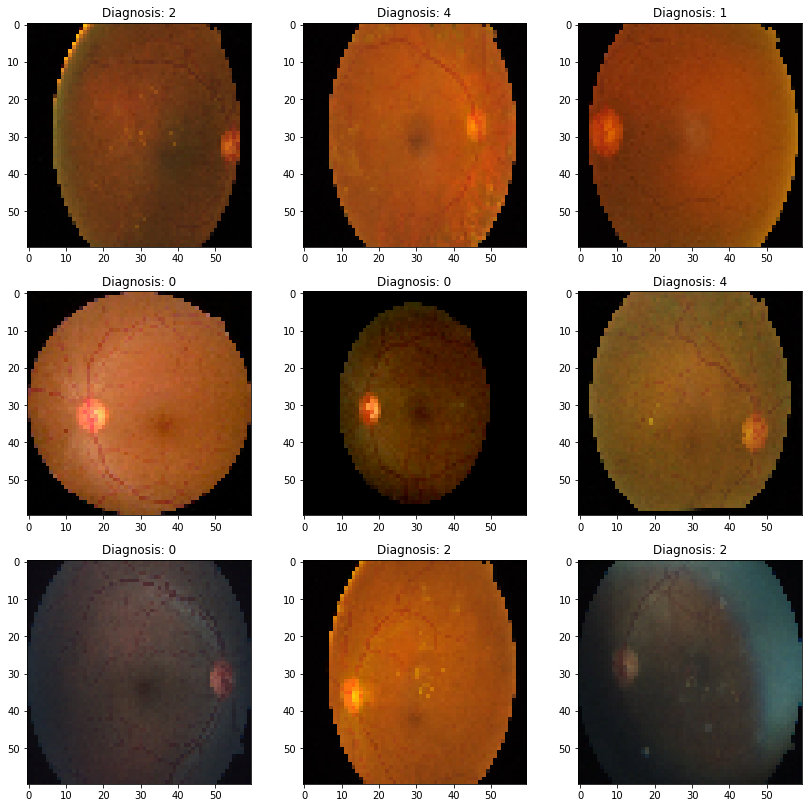

In [ ]:
fig,axs = plt.subplots(3,3,figsize=(14,14))
for i in range(9):
    r=i//3
    c=i%3
    ax=axs[r][c].imshow(train[i])
    ax=axs[r][c].set_title('Diagnosis: '+str(trainlabel[i]))    
plt.show()

In [ ]:
train=np.array(train)
trainlabel=np.array(trainlabel)
test=np.array(test)

In [ ]:
trainlabel2=to_categorical(trainlabel)

In [ ]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [ ]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])



In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(trainx.shape)
print(trainy.shape)

(2929, 60, 60, 3)
(2929, 5)


In [ ]:
print(testx.shape)
print(testy.shape)

(733, 60, 60, 3)
(733, 5)


In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 34s 357ms/step - loss: 1.5106 - accuracy: 0.5227 - val_loss: 2.0587 - val_accuracy: 0.2142
Epoch 2/100
92/92 [==============================] - 27s 289ms/step - loss: 1.0898 - accuracy: 0.6122 - val_loss: 1.8893 - val_accuracy: 0.2333
Epoch 3/100
92/92 [==============================] - 24s 263ms/step - loss: 1.0006 - accuracy: 0.6398 - val_loss: 1.7615 - val_accuracy: 0.1446
Epoch 4/100
92/92 [==============================] - 24s 264ms/step - loss: 0.9277 - accuracy: 0.6658 - val_loss: 1.4733 - val_accuracy: 0.3984
Epoch 5/100
92/92 [==============================] - 22s 236ms/step - loss: 0.8993 - accuracy: 0.6780 - val_loss: 1.1606 - val_accuracy: 0.6303
Epoch 6/100
92/92 [==============================] - 22s 234ms/step - loss: 0.8922 - accuracy: 0.6808 - val_loss: 0.9184 - val_accuracy: 0.6412
Epoch 7/100
92/92 [==============================] - 21s 233ms/step - loss: 0.8853 - accuracy: 0.6804 - val_loss: 0.8123 - val_accuracy:

In [ ]:
from keras.models import save_model
model.save('model/Moduul3/model3.1.h5')

In [ ]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model2 = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])




In [ ]:
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
his2=model2.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 21s 222ms/step - loss: 1.4820 - accuracy: 0.4722 - val_loss: 1.7096 - val_accuracy: 0.2483
Epoch 2/100
92/92 [==============================] - 20s 219ms/step - loss: 1.1663 - accuracy: 0.5910 - val_loss: 2.7511 - val_accuracy: 0.2483
Epoch 3/100
92/92 [==============================] - 20s 221ms/step - loss: 1.0618 - accuracy: 0.6156 - val_loss: 2.3459 - val_accuracy: 0.2483
Epoch 4/100
92/92 [==============================] - 21s 224ms/step - loss: 1.0047 - accuracy: 0.6378 - val_loss: 1.8650 - val_accuracy: 0.2674
Epoch 5/100
92/92 [==============================] - 20s 218ms/step - loss: 0.9824 - accuracy: 0.6415 - val_loss: 1.2528 - val_accuracy: 0.5334
Epoch 6/100
92/92 [==============================] - 20s 221ms/step - loss: 0.9373 - accuracy: 0.6606 - val_loss: 1.0096 - val_accuracy: 0.6194
Epoch 7/100
92/92 [==============================] - 21s 228ms/step - loss: 0.9493 - accuracy: 0.6675 - val_loss: 0.8481 - val_accuracy:

In [ ]:
model2.save('model/Moduul3/model3.2.h5')

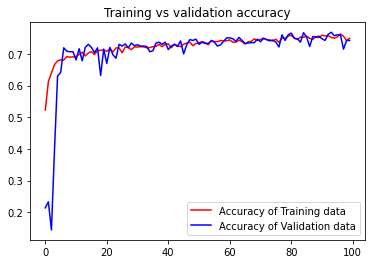

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelacc1.svg")

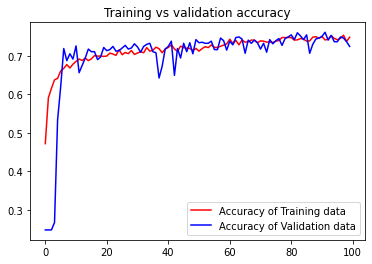

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc2 = his2.history['accuracy']
value_acc2 = his2.history['val_accuracy']
get_loss2 = his2.history['loss']
validation_loss2 = his2.history['val_loss']

epochs = range(len(get_acc2))
plt.plot(epochs, get_acc2, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc2, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelacc2.svg")

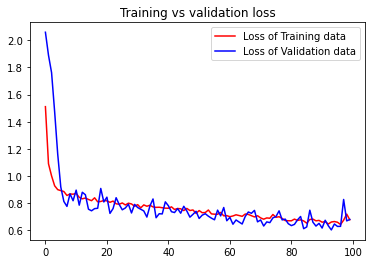

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelloss1.svg")

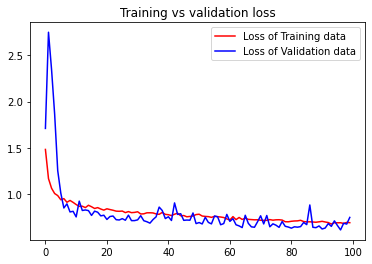

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss2))
plt.plot(epochs, get_loss2, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss2, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("model/Moduul3/modelloss2.svg")

In [ ]:
train_x=np.array(trainx)
test_x=np.array(testx)

test_y=datagen

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(testx)
labels = pred > 0.5

print(classification_report(testy, labels))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       373
           1       0.69      0.26      0.37        70
           2       0.57      0.64      0.60       182
           3       0.60      0.07      0.12        46
           4       0.50      0.02      0.03        62

   micro avg       0.82      0.66      0.73       733
   macro avg       0.67      0.38      0.42       733
weighted avg       0.78      0.66      0.68       733
 samples avg       0.66      0.66      0.66       733



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

pred = model2.predict(testx)
labels = pred > 0.5

print(classification_report(testy, labels))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       373
           1       0.50      0.14      0.22        70
           2       0.52      0.86      0.65       182
           3       1.00      0.02      0.04        46
           4       0.00      0.00      0.00        62

   micro avg       0.76      0.70      0.73       733
   macro avg       0.60      0.39      0.37       733
weighted avg       0.74      0.70      0.67       733
 samples avg       0.70      0.70      0.70       733



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
